In [1]:
%config InlineBackend.figure_formats = ['svg']
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
url = r'https://www.meetup.com/mu_api/urlname/events/eventId/attendees?queries=%28endpoint%3Adata-mineurs%2Fevents%2F287574315%2Frsvps%2Cmeta%3A%28method%3Aget%29%2Cparams%3A%28desc%3A%21t%2Cfields%3A%27answers%2Cpay_status%2Cself%2Cweb_actions%2Cattendance_status%27%2Conly%3A%27answers%2Cresponse%2Cattendance_status%2Cguests%2Cmember%2Cpay_status%2Cupdated%27%2Corder%3Atime%29%2Cref%3AeventAttendees_data-mineurs_285658288%2Ctype%3Aattendees%29'

In [3]:
r = requests.get(url)

In [4]:
data = r.json()
attendees = data['responses'][0]['value']

In [5]:
lst = [
    {
        'ts': item['updated'],
        'name': item['member']['name'],
    }
    for item in attendees
]

In [6]:
df = pd.DataFrame.from_dict(lst)
df = df\
    .sort_values(by='ts', ascending=True)\
    .reset_index()
df['nr'] = df.index + 1
df['dt'] = pd.to_datetime(df['ts'], unit='ms')
df.set_index('ts', inplace=True)
del df['index']
df

,name,nr,dt
ts,,,
1659465231000,Quentin B.,1,2022-08-02 18:33:51
1659465231000,Nicolas I.,2,2022-08-02 18:33:51
1659465231000,Laetitia D.,3,2022-08-02 18:33:51
1659465231000,Thibaut G.,4,2022-08-02 18:33:51
1659465232000,Joël B.,5,2022-08-02 18:33:52
1659520565000,Olivier B.,6,2022-08-03 09:56:05
1659599469000,Ivan C.,7,2022-08-04 07:51:09
1659632248000,Margaux G.,8,2022-08-04 16:57:28
1659876830000,Michaël S.,9,2022-08-07 12:53:50


<AxesSubplot:xlabel='ts'>

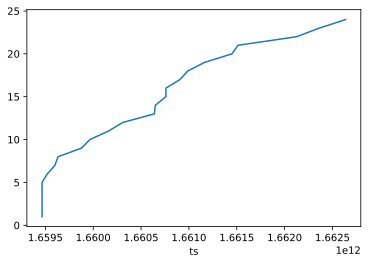

In [7]:
df['nr'].plot()

In [8]:
X = df.index.values.reshape(-1, 1)
y = df['nr'].values

In [9]:
model = LinearRegression().fit(X, y)

In [10]:
df['regress'] = model.predict(X)

In [11]:
df.set_index('dt', inplace=True)

<AxesSubplot:title={'center':'Nombre de participants'}, xlabel='dt'>

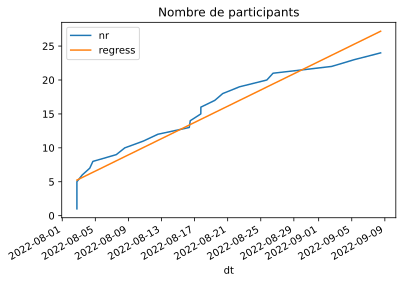

In [12]:
df[['nr', 'regress']].plot(title='Nombre de participants')

In [13]:
event_dt = datetime(2022, 9, 22, 19, 30)
prediction_event = model.predict([[event_dt.timestamp() * 1000]])[0]
df.loc[event_dt] = ['Prédiction', None, prediction_event]

In [14]:
df

,name,nr,regress
dt,,,
2022-08-02 18:33:51,Quentin B.,1,5.240387
2022-08-02 18:33:51,Nicolas I.,2,5.240387
2022-08-02 18:33:51,Laetitia D.,3,5.240387
2022-08-02 18:33:51,Thibaut G.,4,5.240387
2022-08-02 18:33:52,Joël B.,5,5.240394
2022-08-03 09:56:05,Olivier B.,6,5.623291
2022-08-04 07:51:09,Ivan C.,7,6.169296
2022-08-04 16:57:28,Margaux G.,8,6.396122
2022-08-07 12:53:50,Michaël S.,9,8.088596


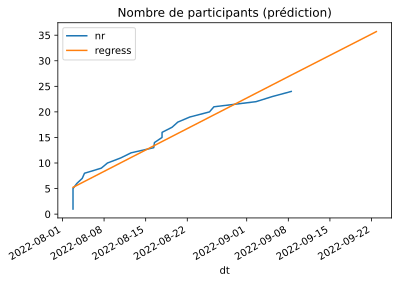

In [15]:
ax = df[['nr', 'regress']].plot(title='Nombre de participants (prédiction)', style=[])

In [16]:
int(prediction_event)

35